# scplotter to work with 10x Visium data prepared by Seurat

Go back to scplotter documentation: <https://pwwang.github.io/scplotter/>

## Mouse Brain: 10x Genomics Xenium In Situ

See: <https://satijalab.org/seurat/articles/seurat5_spatial_vignette_2#mouse-brain-10x-genomics-xenium-in-situ>

In [1]:
suppressPackageStartupMessages({
    library(Seurat)
})
# Load the scplotter package
# library(scplotter)
devtools::load_all()
# devtools::load_all("../../../plotthis")

path <- "data/xenium_tiny_subset/outs"
# path <- "data/Xenium_Giotto_workshop"
# Load the Xenium data
xenium.obj <- LoadXenium(path, fov = "fov")
# remove cells with 0 counts
xenium.obj <- subset(xenium.obj, subset = nCount_Xenium > 0)

xenium.obj

ℹ Loading scplotter
Warning message:
“cells did not contain a segmentation_method column. Skipping...”
Genome matrix has multiple modalities, returning a list of matrices for this genome

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“

An object of class Seurat 
541 features across 36553 samples within 4 assays 
Active assay: Xenium (248 features, 0 variable features)
 1 layer present: counts
 3 other assays present: BlankCodeword, ControlCodeword, ControlProbe
 1 spatial field of view present: fov

Warning message in GetAssayData.StdAssay(object = object[[assay]], layer = layer):
“data layer is not found and counts layer is used”


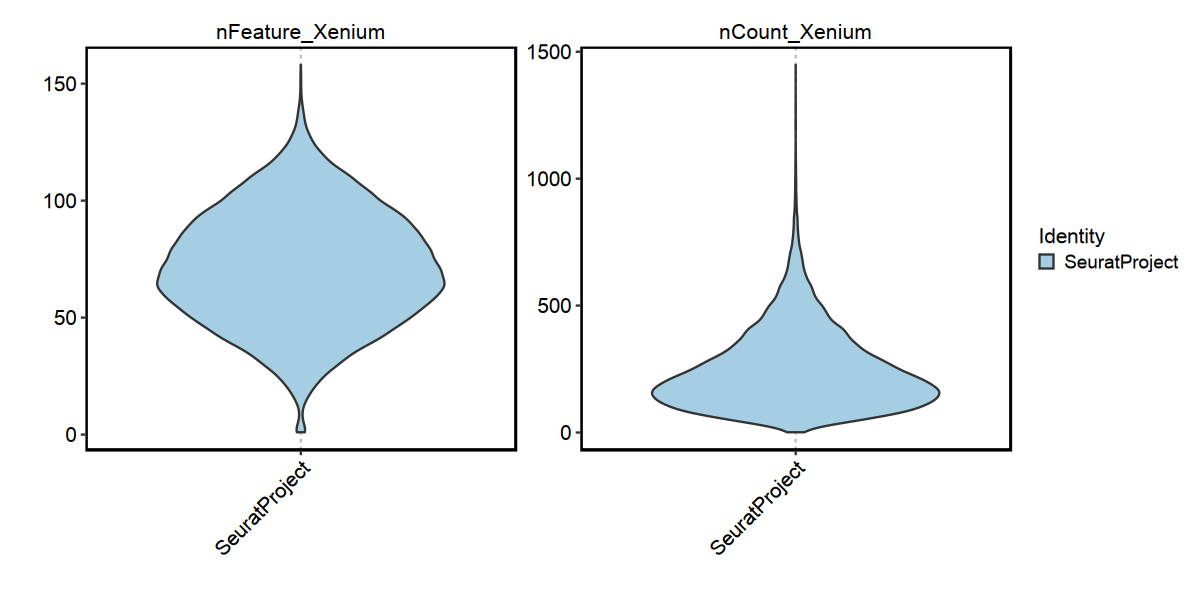

In [2]:
options(repr.plot.width = 10, repr.plot.height = 5)

FeatureStatPlot(xenium.obj, features = c("nFeature_Xenium", "nCount_Xenium"),
    facet_scales = "free_y")

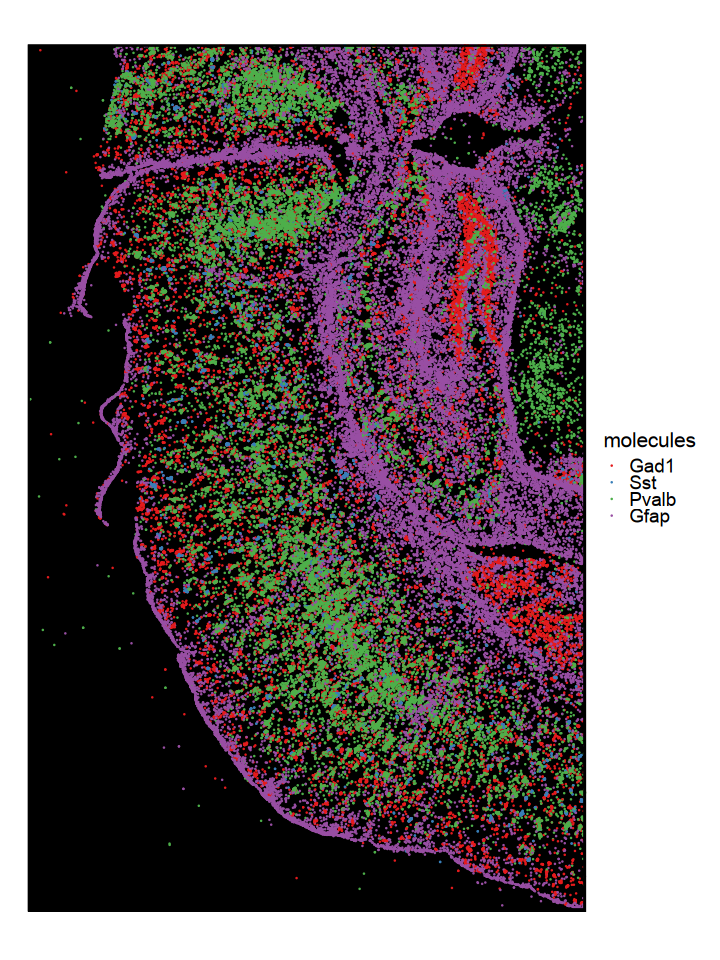

In [3]:
options(repr.plot.width = 6, repr.plot.height = 8)
# devtools::load_all()

SpatDimPlot(xenium.obj, image = "black", features = c("Gad1", "Sst", "Pvalb", "Gfap"),
    nmols = 20000, points_size = 0.1, points_palette = "Set1")

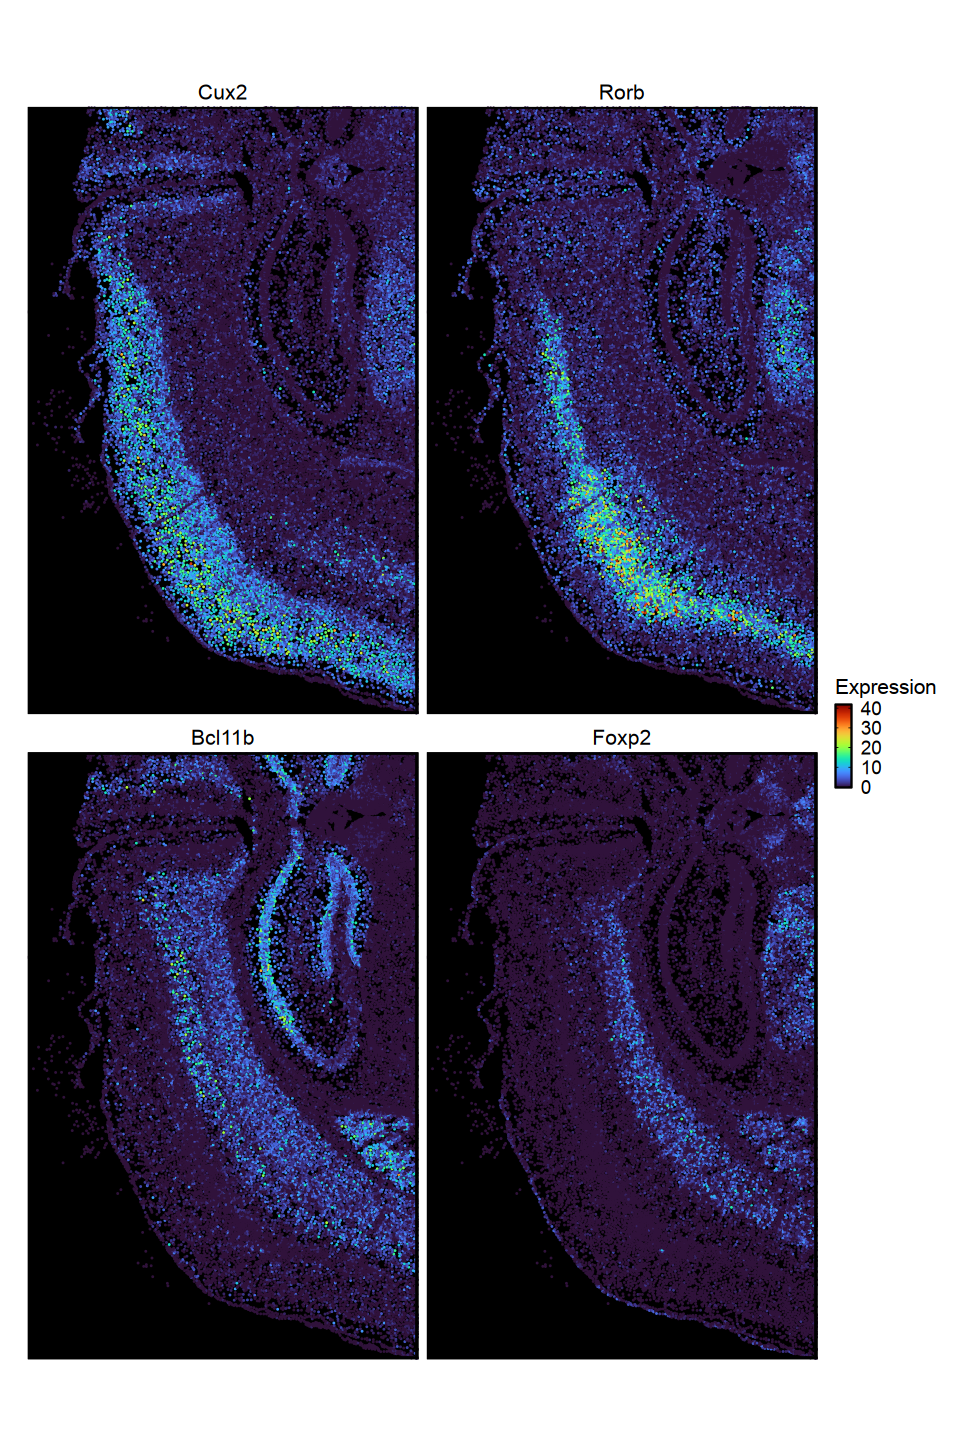

In [4]:
options(repr.plot.width = 8, repr.plot.height = 12)

SpatFeaturePlot(xenium.obj, layer = "counts", image = "black",
    features = c("Cux2", "Rorb", "Bcl11b", "Foxp2"),
    points_size = 0.2, points_color_name = "Expression")

Warning message:
“Key ‘Xenium_’ taken, using ‘zoom_’ instead”
Warning message in SpatPlot.Seurat.FOV(object, image = image, ...):
“[SpatPlot] 'shapes' is set to TRUE, meaning the same boundaries as points will be used. You may want to provide a different boundaries for shapes. Otherwise the shapes is plotted as points.”


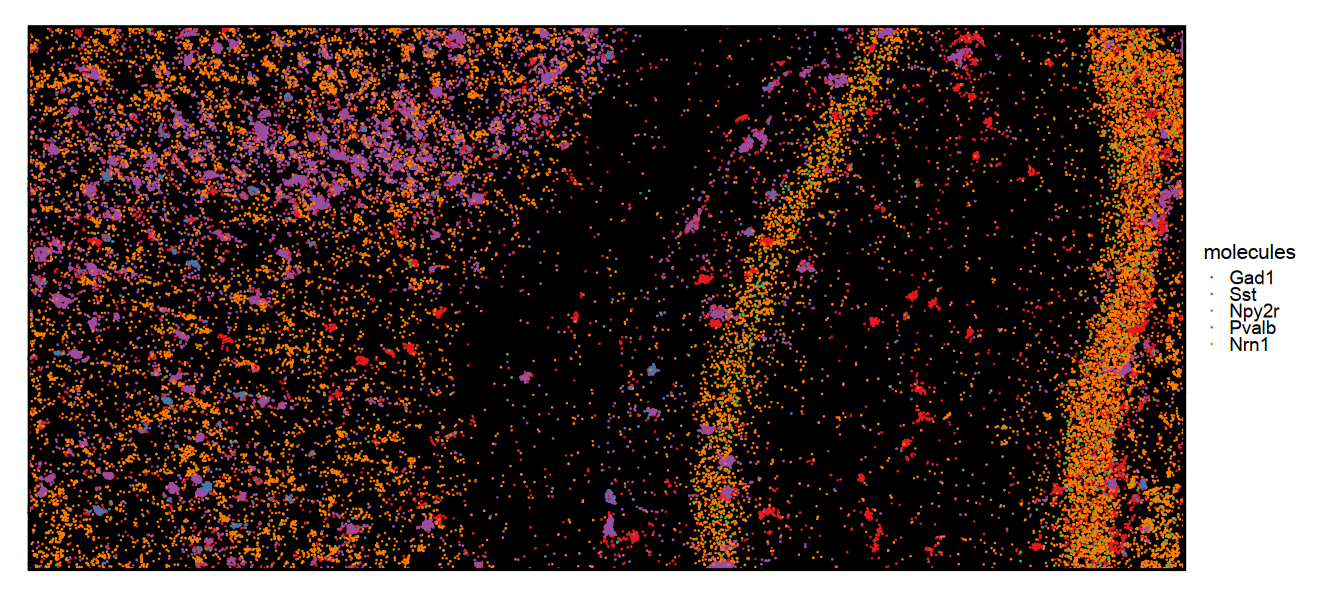

In [6]:
options(repr.plot.width = 11, repr.plot.height = 5, future.globals.maxSize = 1024 ^ 3)

cropped.coords <- Crop(xenium.obj[["fov"]], x = c(1200, 2900), y = c(3750, 4550), coords = "plot")
xenium.obj[["zoom"]] <- cropped.coords
# visualize cropped area with cell segmentations & selected molecules
# The segmentation boundary was not loaded anyway...
# DefaultBoundary(xenium.obj[["zoom"]]) <- "segmentation"

SpatDimPlot(xenium.obj, fov = "zoom", image = "black", features = c("Gad1", "Sst", "Npy2r", "Pvalb", "Nrn1"),
    nmols = 10000, points_size = 0.1, points_palette = "Set1", shapes = TRUE)

In [7]:
xenium.obj <- SCTransform(xenium.obj, assay = "Xenium")
xenium.obj <- RunPCA(xenium.obj, npcs = 30, features = rownames(xenium.obj))
xenium.obj <- RunUMAP(xenium.obj, dims = 1:30)
xenium.obj <- FindNeighbors(xenium.obj, reduction = "pca", dims = 1:30)
xenium.obj <- FindClusters(xenium.obj, resolution = 0.3)

Running SCTransform on assay: Xenium

vst.flavor='v2' set. Using model with fixed slope and excluding poisson genes.

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 248 by 36553

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 248 genes, 5000 cells

Second step: Get residuals using fitted parameters for 248 genes

Computing corrected count matrix for 248 genes

Calculating gene attributes

Wall clock passed: Time difference of 3.678288 secs

Determine variable features

Centering data matrix

Place corrected count matrix in counts slot

Set default assay to SCT

PC_ 1 
Positive:  Slc17a7, Nrn1, Epha4, Neurod6, Nwd2, Gad1, Cpne4, Rasgrf2, Rims3, Lamp5 
	   2010300C02Rik, Dkk3, Slc17a6, Pvalb, Garnl3, Cpne6, Fhod3, Plcxd2, Gad2, Tmem132d 
	   Kcnh5, Dner, Calb1, Bhlhe22, Bcl11b, Nell1, Bdnf, Rasl10a, Satb2, Arc 
Negative:  Igf2, Dcn, Fmod, Slc13a4, Fn1, Aldh1a2, Col1a1, Ly6a

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 36553
Number of edges: 1340890

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9587
Number of communities: 28
Elapsed time: 4 seconds


Warning message:
“No FOV associated with assay 'SCT', using global default FOV”


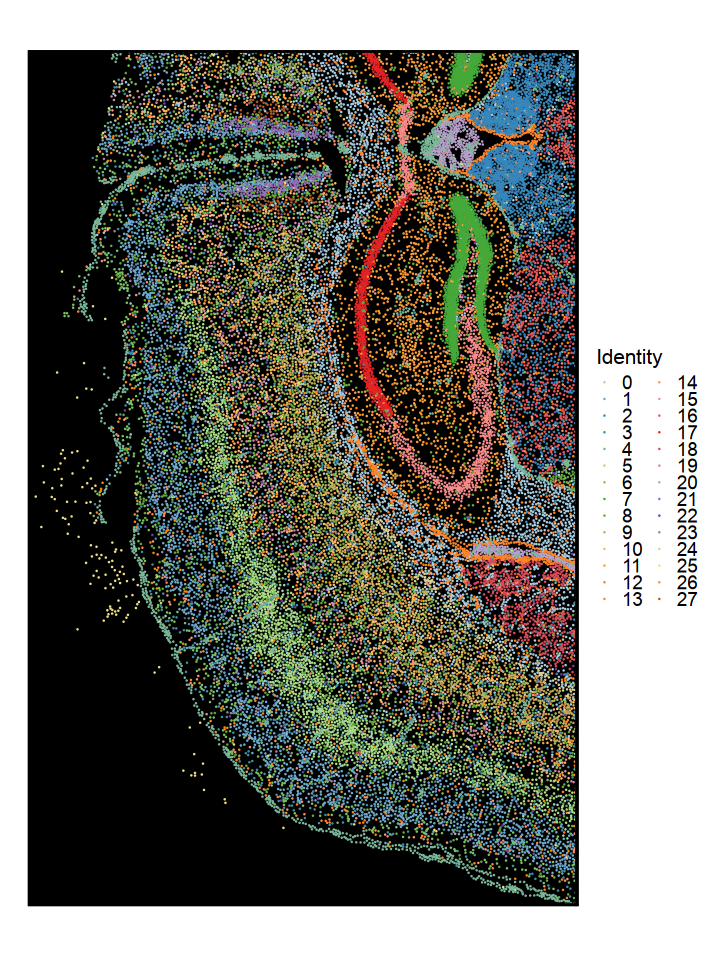

In [8]:
options(repr.plot.width = 6, repr.plot.height = 8)

SpatDimPlot(xenium.obj, image = "black", points_size = 0.1)

Warning message:
“No FOV associated with assay 'SCT', using global default FOV”


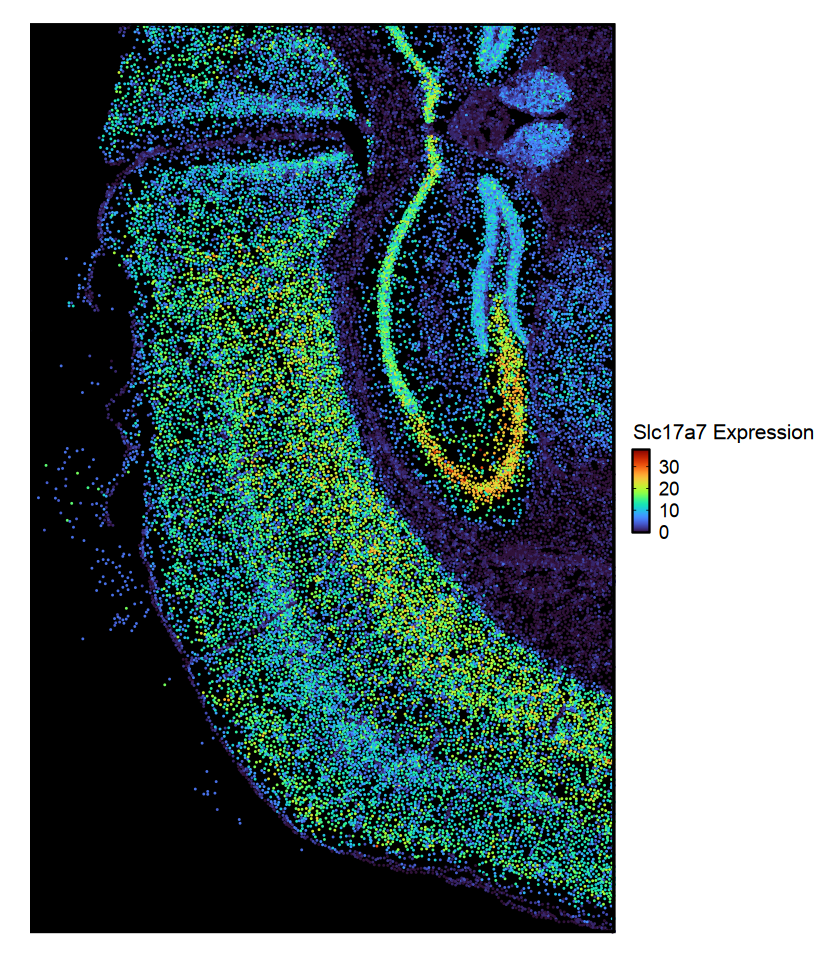

In [10]:
options(repr.plot.width = 7, repr.plot.height = 8)

SpatFeaturePlot(xenium.obj, layer = "counts", image = "black",
    features = "Slc17a7", points_size = 0.2, points_color_name = "Slc17a7 Expression")

Warning message:
“Key ‘Xenium_’ taken, using ‘crop_’ instead”
Warning message in `[<-.data.frame`(`*tmp*`, , features, value = structure(list(:
“replacement element 1 has 36553 rows to replace 11872 rows”
Warning message:
“No FOV associated with assay 'SCT', using global default FOV”


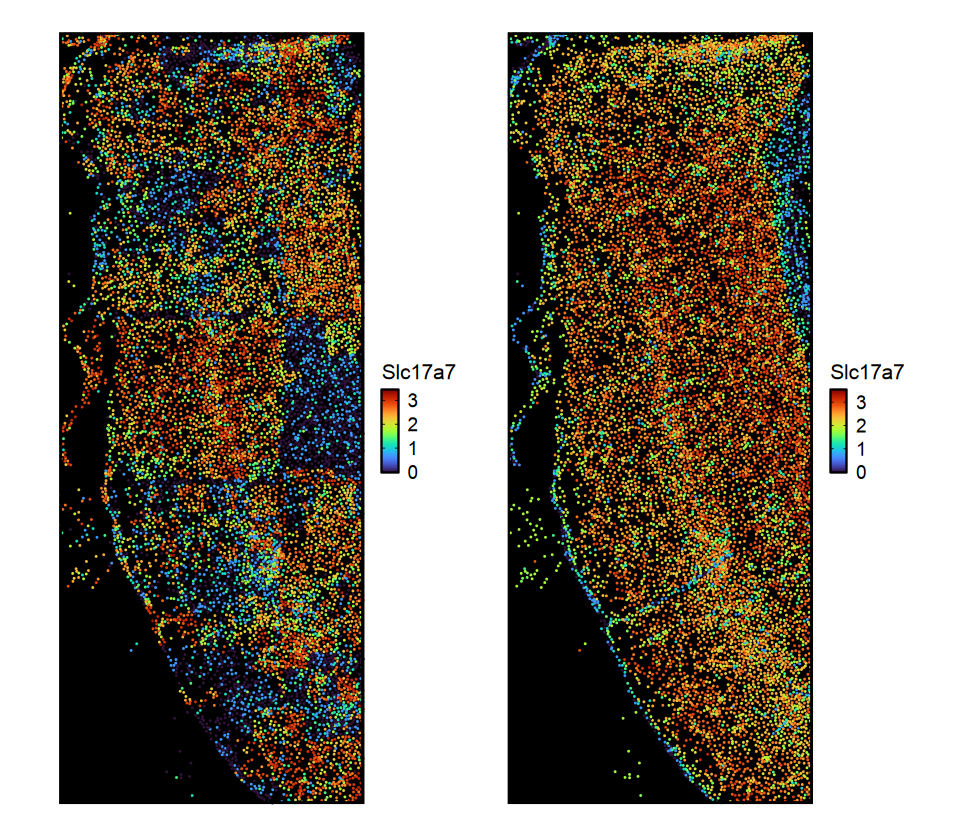

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 7)

crop <- Crop(xenium.obj[["fov"]], x = c(600, 2100), y = c(900, 4700))
xenium.obj[["crop"]] <- crop
p1 <- SpatFeaturePlot(xenium.obj, fov = "crop", features = "Slc17a7",
    image = "black", points_size = 0.2)

# use ext argument to crop
p2 <- SpatFeaturePlot(xenium.obj, ext = c(600, 2100, 900, 4700), features = "Slc17a7",
    image = "black", points_size = 0.2)

p1 + p2

## Mini Xenium Dataset provided by Giotto vignette

See: <https://drieslab.github.io/giotto_workshop_2024/xenium-1.html>

In [22]:
path <- "data/Xenium_Giotto_workshop"
# Load the Xenium data
g <- LoadXenium(path, fov = "fov")
# remove cells with 0 counts
g <- subset(g, subset = nCount_Xenium > 0)

g

Warning message:
“cells did not contain a segmentation_method column. Skipping...”


Error in option$fn(file.path(data.dir, option$filename)) : File not found


10X data contains more than one type and is being returned as a list containing matrices of each type.

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”


An object of class Seurat 
541 features across 7654 samples within 4 assays 
Active assay: Xenium (377 features, 0 variable features)
 1 layer present: counts
 3 other assays present: BlankCodeword, ControlCodeword, ControlProbe
 1 spatial field of view present: fov

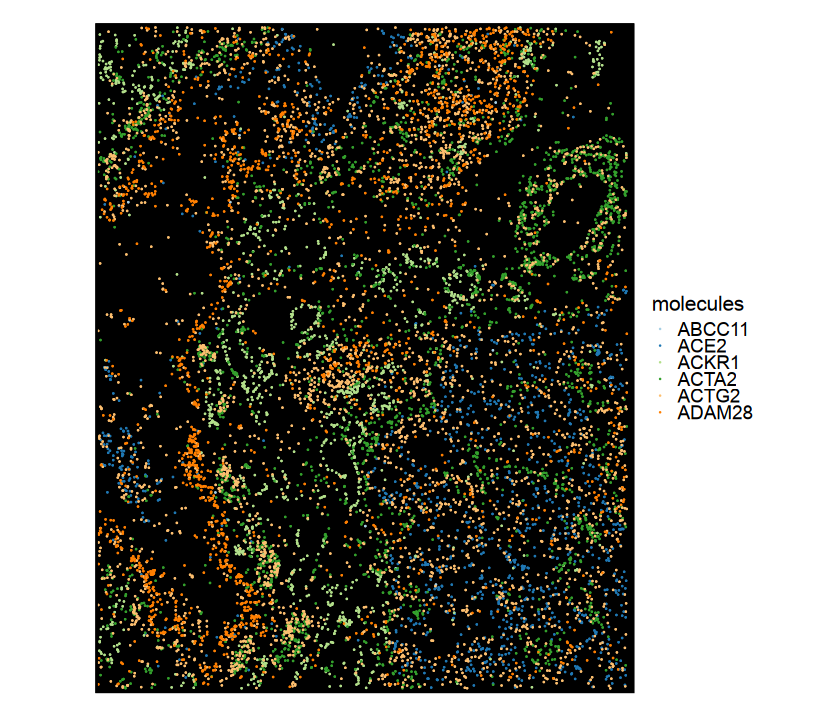

In [34]:
# Simple Visualization
options(repr.plot.width = 7, repr.plot.height = 6)

SpatDimPlot(
    g,
    image = "black",
    # put shapes at last
    layers = c("image", "points", "shapes"),
    features = c("ABCC11", "ACE2", "ACKR1", "ACTA2", "ACTG2", "ADAM28"),
    shapes_border_color = "cyan",
    shapes_border_size = 0.1,
    shapes_fill_by = "black",
    points_size = 0.1,
    nmols = 10000
)
